## UNAD Analisis de Datos Unidad 3 - Tarea 4
## Nombre de Estudiantes: 
### Anderson Andrey Quitian Perez.  
### Manuel Ricardo Hernandez
### Brean Estiven Vidales Romero. 

## Grupo Colaborativo: 202016908_64

## 1. Realizar un Analisis Exploratorio de los Datos para identificar relaciones entre variables, valores atipicos, tendencias, etc. 

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [99]:
Mall = pd.read_csv('C:/Users/sopor/OneDrive - Universidad Nacional Abierta y a Distancia/ANALISIS DE DATOS/Entrega 4/DATA/Mall_Clientes.csv')

In [101]:
Mall.head(200)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [103]:
Mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Datos Faltantes y Atipicos dentro de Dataset')

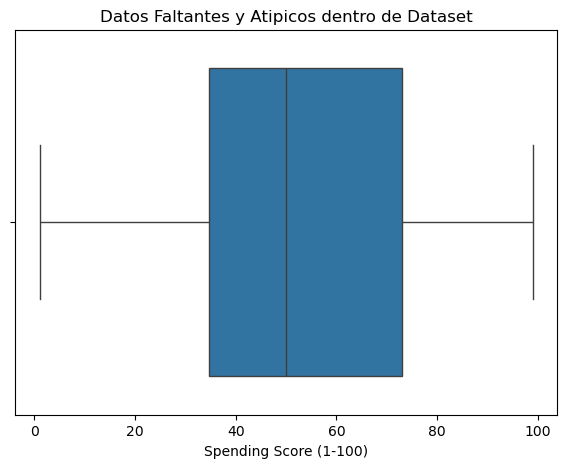

In [105]:
plt.figure(figsize=(7,5))
sns.boxplot(x=Mall['Spending Score (1-100)'])
plt.title('Datos Faltantes y Atipicos dentro de Dataset', fontsize=12)

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [108]:
#Validacion de Datos Faltantes.  
print("Numero de Registros faltantes en Edad (Age): ", Mall['Age'].isin([0]).sum())
print("Numero de Registros faltantes en Ingresos Anuales (Annual Income (k$)): ", Mall['Annual Income (k$)'].isin([0]).sum())
print("Numero de Registros faltantes en Puntaje de Gastos (Spending Score (1-100)): ", Mall['Spending Score (1-100)'].isin([0]).sum())

Numero de Registros faltantes en Edad (Age):  0
Numero de Registros faltantes en Ingresos Anuales (Annual Income (k$)):  0
Numero de Registros faltantes en Puntaje de Gastos (Spending Score (1-100)):  0


In [110]:
#Reemplazar datos que estan en cero por el promedio.  
Mall['Spending Score (1-100)']=Mall['Spending Score (1-100)'].replace(0,Mall['Spending Score (1-100)'].mean())

### *Identificacion de Datos Atipicos.*

Text(0.5, 1.0, 'Identificación de Datos Atipicos.')

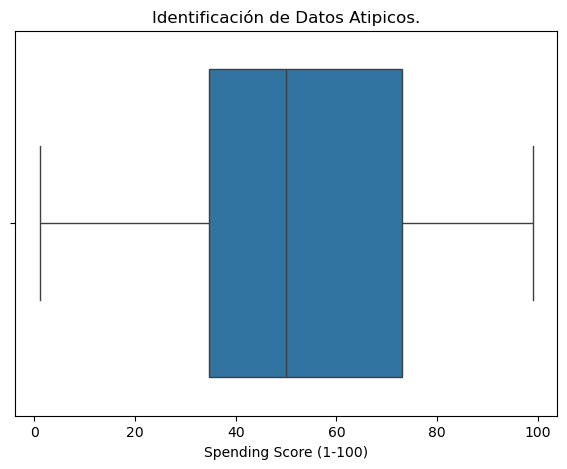

In [113]:
plt.figure(figsize=(7,5))
sns.boxplot(x=Mall['Spending Score (1-100)'])
plt.title('Identificación de Datos Atipicos.', fontsize=12)

### *Conteo de Datos Atipicos.*

In [116]:
level_min=0
level_max=100
Total_Atip=((Mall['Spending Score (1-100)']<level_min)|(Mall['Spending Score (1-100)']>level_max)).sum()
print("Total de datos atipico es de {}.".format(Total_Atip))

Total de datos atipico es de 0.


### **Revisión de los tipos de datos y datos faltantes.**

In [119]:
Mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 

Caracteristicas de interes para el agrupamiento. 

* Edad "Age".
* Ingresos Anuales "Annual Income (k$)".
* Puntaje de Gastos "Spending Score (1-100)".  

### Filtrar columna del modelo.  

In [125]:
Mall = Mall [['Age','Annual Income (k$)','Spending Score (1-100)']]

In [127]:
Mall.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


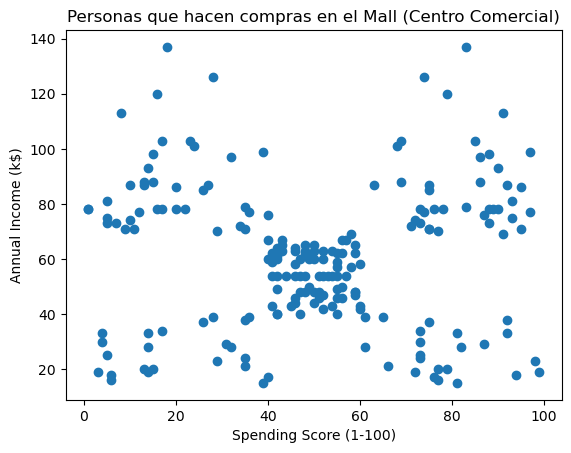

In [129]:
plt.scatter(Mall['Spending Score (1-100)'],Mall['Annual Income (k$)'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('Personas que hacen compras en el Mall (Centro Comercial)' )
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros.  

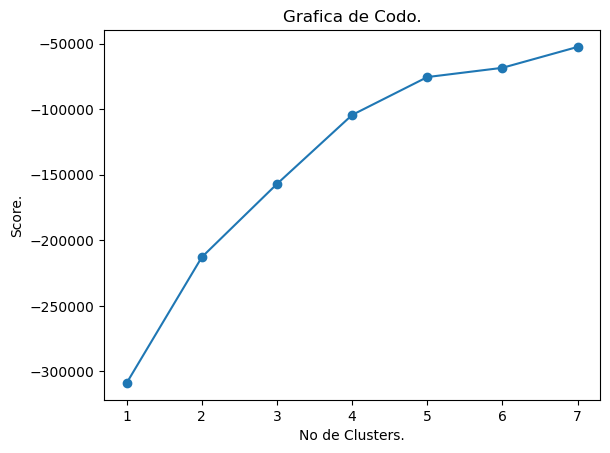

In [143]:
Rc = range(1,8)
kmeans = [KMeans(n_clusters=i) for i in Rc]
kmeans
score = [kmeans[i].fit(Mall).score(Mall) for i in range (len(kmeans))]
score 
plt.plot(Rc,score,marker='o')
plt.xlabel('No de Clusters.')
plt.ylabel('Score.')
plt.title('Grafica de Codo.')
plt.show()

### Generación del modelo de Agrupacion del Modelo con K=6. 

In [148]:
Clus_Model = KMeans(n_clusters=6, random_state=0)
Clus_Model.fit(Mall)

KMeans(n_clusters=6, random_state=0)

In [150]:
Clus_Model.labels_
Mall["Grupo"] = Clus_Model.labels_
print (Mall)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      2
1     21                  15                      81      5
2     20                  16                       6      2
3     23                  16                      77      5
4     31                  17                      40      2
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. 

In [168]:
Objs = len(Mall)
X = Mall.drop('Grupo', axis=1)
clusters = Mall['Grupo']

sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X,clusters)
davies_score = davies_bouldin_score(X, clusters)

table_dat = [
    ["Numero de Observaciones:", Objs], 
    ["Coeficiente Silhouette:", sil_score], 
    ["Indice Calinski Harabasz:", calinski_score],  
    ["Indice Davies Bouldin:", davies_score]
]
from tabulate import tabulate
print(tabulate(table_dat, headers=["Metric","Value"], tablefmt='pretty'))

+---------------------------+---------------------+
|          Metric           |        Value        |
+---------------------------+---------------------+
| Numero de Observaciones:  |         200         |
|  Coeficiente Silhouette:  | 0.45095124469943243 |
| Indice Calinski Harabasz: |  166.5857109469557  |
|  Indice Davies Bouldin:   | 0.7515325100425706  |
+---------------------------+---------------------+


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

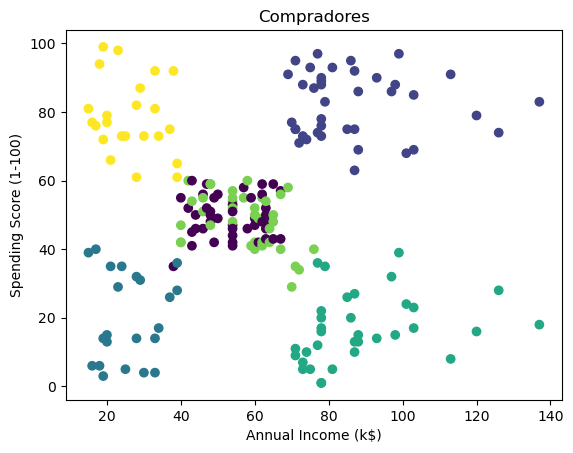

In [173]:
plt.scatter(Mall['Annual Income (k$)'], Mall['Spending Score (1-100)'], c=Mall['Grupo'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Compradores')
plt.show()

### **Grafica en 3D.**

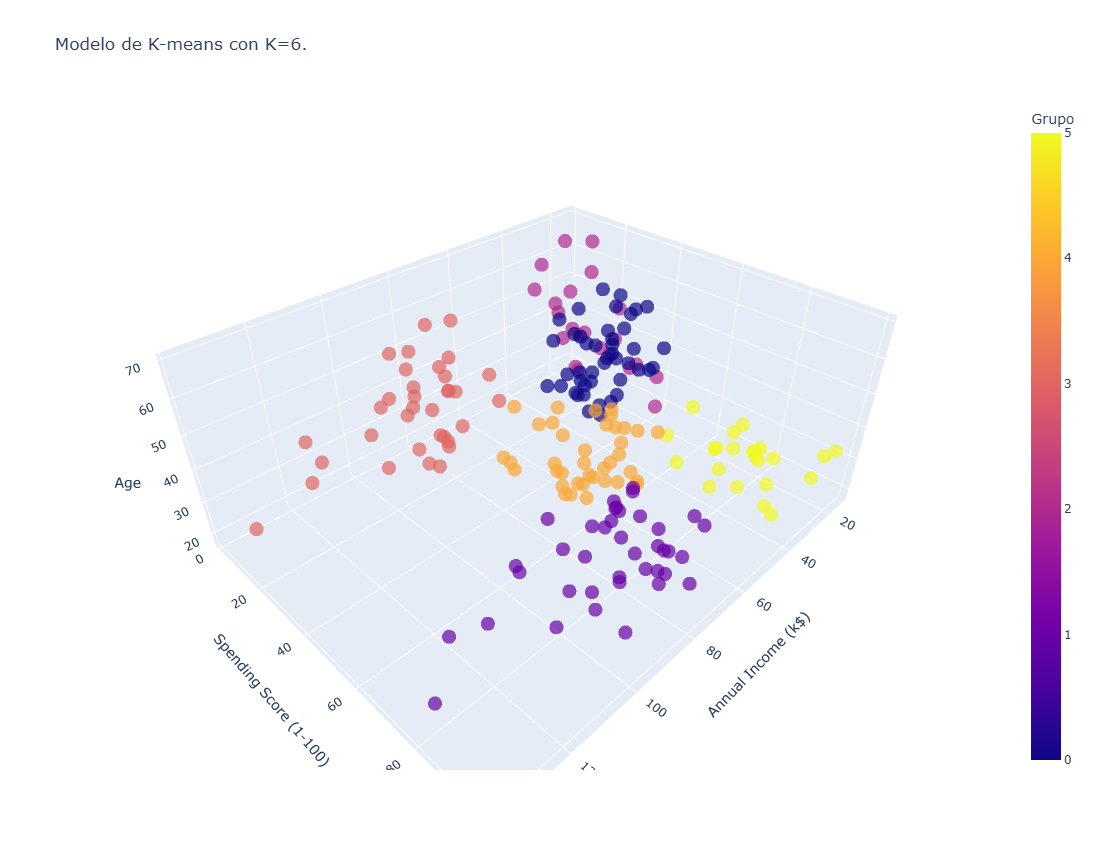

In [197]:
Grafica_3D = px.scatter_3d(Mall, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Grupo', symbol='Grupo',
                        symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4:'circle', 5:'circle'}, 
                        opacity=0.7, width=900, height=850, title=f'Modelo de K-means con K={6}.', labels={'label': 'cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 

## 7. Interpretar, analizar y documentar los resultados obtenidos.  

Con el desempeño de modelo creaco se puede describir que:  

**1. Coeficiente de Silhouette: Valor de 0.45.**
    
Esto nos dice que se encuentra por debajo del umbral de acuerdo con lo establecido de 0.5, indicandonos que hay una separacion moderada entre los clusters. Dicho valor suguiere que en algunos puntos puede estar relativamente cerca de los limites de otros clusters, o que podria significar una cierta superposición.

La calidad de la segmentación es aceptable, pero podria mejorar. Dentro de un contexto ideal, un coeficiente de Silhouette superior a 0.5 o incluso mas cercano a 1 seria preferible. Lo que podria indicarnos la necesidad de ajustar el numero de Clusters o realizar una revisión a los parametros del modelo K-Means.  

**2. Índice de Calinski-Harabasz: Valor 166.59.**

Podemos ver que no hay un rango especifico, pero los valores mas altos indican una mejor separación y compacidad de los clustres. Un valor de 166.59 aproximadamente, sugiere que los clusters tienen una estructura razonable en cuento a compacidad y separación. Los valores indican que hay una buena cohesión dentro de los clusters y separación entre ellos. Sin embargo, sin valores de comparación para otros números de clusters, es muy dificil determinar si es el mejor valor posible. 

**3. Índice Davies Bouldin: Valor 0.75.**

Estos tienen un rango que comienza en 0 (mejor valor posible) y valores bajos indican buena separación y compacidad de los clústeres. Un valor de 0.75 es bastante bajo, lo cual es positivo y sugiere que los clústeres están bien separados.
Este valor indica que los clústeres están bien definidos y relativamente compactos, lo cual respalda la calidad de la segmentación obtenida. En general, un índice de Davies-Bouldin menor a 1 es considerado bueno.   

Es de Considerar que hay una posibilidad de probar con diferentes números de clústeres para ver si se obtienen mejores resultados, especialmente si se observa que el coeficiente de Silhouette mejora.